In [2]:
import os
os.chdir("..")
from sklearn.metrics import accuracy_score
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from collections import Counter
import pandas as pd
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics
from sklearn.metrics import f1_score
from guardrails.utils import Utils

utils = Utils()

# Evaluation

### 1. Llama3 7B with in-context-learning

#### Load data

In [57]:
llm_y_pred = utils.load(dir='experiments/llm/', file_name='y_pred')
llm_y_true = utils.load(dir='experiments/llm/', file_name='y_true')

#### Analyse and update predicted labels

In [58]:
print('Predicted labels by LLM Classifier:')
count_dict = dict(Counter(llm_y_pred).items())
print(count_dict)

# Replace labels 2 < with 1 (assuming we want to optimize our system for recall)
for i in range(len(llm_y_pred)):
    if llm_y_pred[i]>1:
        llm_y_pred[i]=1

print()
print('Updated labels by LLM Classifier:')
count_dict = dict(Counter(llm_y_pred).items())
print(count_dict)

Predicted labels by LLM Classifier:
{0: 1567, 1: 1287, 2: 140, 4: 4, 3: 2}

Updated labels by LLM Classifier:
{0: 1567, 1: 1433}


### Evaluation

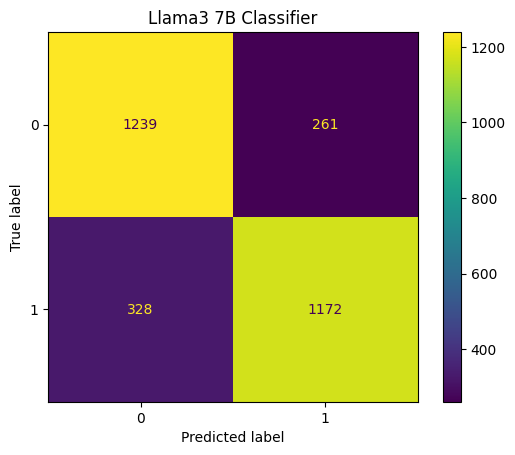

In [59]:
ConfusionMatrixDisplay.from_predictions(llm_y_true, llm_y_pred)
plt.title("Llama3 7B Classifier")
plt.show()


In [33]:
accuracy = accuracy_score(llm_y_true, llm_y_pred)
precision = precision_score(llm_y_true, llm_y_pred)
recall = recall_score(llm_y_true, llm_y_pred)
f1 = f1_score(llm_y_true, llm_y_pred)

print('LLM Classifier Evaluation Summary: ')
print("Accuracy Score: ", round(accuracy, 2))
print("Precision: ", round(precision,2))
print("Recall: ", round(recall,2))
print("F1 Score: ", round(f1,2))

LLM Classifier Evaluation Summary: 
Accuracy Score:  0.8
Precision:  0.82
Recall:  0.78
F1 Score:  0.8


### 2. Two Layer Neural Network

In [34]:
nn_y_pred = utils.load(dir='experiments/nn/', file_name='y_pred')
nn_y_true = utils.load(dir='experiments/nn/', file_name='y_true')

In [37]:
print('Predicted labels by NN Classifier:')
count_dict = dict(Counter(nn_y_pred).items())
print(count_dict)

Predicted labels by NN Classifier:
{0: 1323, 1: 1677}


### Evaluation

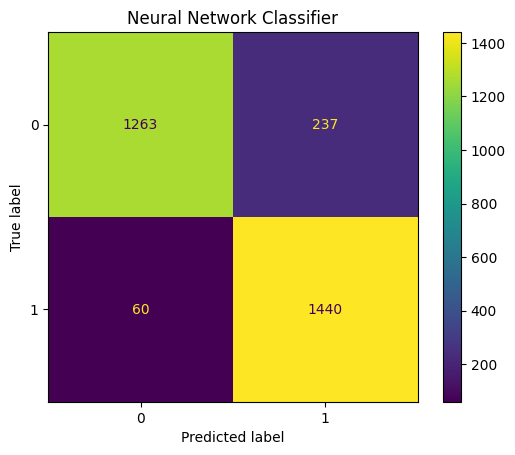

In [40]:
ConfusionMatrixDisplay.from_predictions(nn_y_true, nn_y_pred)
plt.title("Neural Network Classifier")
plt.show()

In [39]:
accuracy = accuracy_score(nn_y_true, nn_y_pred)
precision = precision_score(nn_y_true, nn_y_pred)
recall = recall_score(nn_y_true, nn_y_pred)
f1 = f1_score(nn_y_true, nn_y_pred)

print('Neural Network Classifier Evaluation Summary: ')
print("Accuracy Score: ", round(accuracy, 2))
print("Precision: ", round(precision,2))
print("Recall: ", round(recall,2))
print("F1 Score: ", round(f1,2))

Neural Network Classifier Evaluation Summary: 
Accuracy Score:  0.9
Precision:  0.86
Recall:  0.96
F1 Score:  0.91
